In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-data-set/diabetes.csv


In [36]:
df = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd

# Assuming you want to use columns 0 and 8 as features
X = df.iloc[:,[0,7]]
y = df.Outcome

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initialize and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(x_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy =", accuracy)


Accuracy = 0.6770833333333334


In [38]:
#import the metrics class
from sklearn import metrics

#confusion metrix 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 49,  13]])

Text(0.5, 23.52222222222222, 'Predicted label')

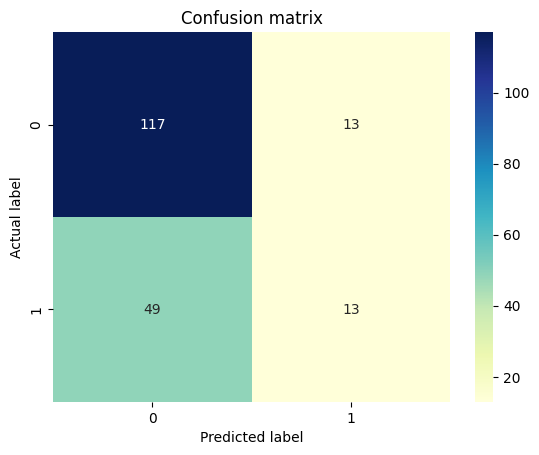

In [39]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.heatmap(pd.DataFrame(cnf_matrix),annot =True, cmap= 'YlGnBu',fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [40]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:", metrics.recall_score(y_test,y_pred))

Accuracy: 0.6770833333333334
Precision: 0.5
Recall: 0.20967741935483872
